# Comprehensive Analysis of EPL Match Data

Github Link here - https://github.com/RishiMMMM/Comprehensive-analysis-of-EPL-match-data

## Introduction
Our project is about digging into a big set of data from English Premier League football matches to find patterns and make predictions about which teams will win. Football is not just a game for us; it's a puzzle with pieces scattered in rows of data. With over 5000 matches' worth of details, we're looking to sort through the stats and come up with smart guesses on game outcomes. It's a project that mixes our love of the sport with our interest in data, and we hope it can help fans and experts get new insights into the game.

## Changes Since the Proposal
Since our initial project proposal, our scope has expanded to include a deeper statistical analysis and more complex machine learning models. We first used Random Forest Classifiers and now expanded to using Support Vector Machines and Gradient Boosting algorithms. We've also decided to incorporate additional data visualization techniques to better understand the dataset.

## Data
We performed web scraping from the website, 'https://fbref.com/en/comps/9/Premier-League-Stats'

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

We collected data from 2017 season onwards till February 2024

In [2]:
years = list(range(2023, 2017, -1))

In [ ]:
session = requests.Session()

# Replace with your login credentials and the login URL
payload = {
    'username': 'rmadha4',
    'password': 'Madhavaram@1'
}
login_page_url = 'https://stathead.com/users/login.cgi?token=1&__hstc=218152582.ffc1803babda4560a6e1c515a5470632.1706293742957.1708048543953.1708712387309.10&__hssc=218152582.6.1708712387309&__hsfp=3370414631&_gl=1*1s7yczf*_ga*MTYyMTU4MDIxMS4xNzA2MjkzNzM4*_ga_80FRT7VJ60*MTcwODcxMjM4Mi4xNS4xLjE3MDg3MTM5NTMuMC4wLjA.&redirect_uri=https%3A//fbref.com/en/comps/9/Premier-League-Stats'
session.post(login_page_url, data = payload)
all_matches = []
standings_url = 'https://fbref.com/en/comps/9/Premier-League-Stats'
for year in years:
    data = session.get(standings_url)
    soup = BeautifulSoup(data.text)
    standings_table = soup.select('table.stats_table')[0]
    links = standings_table.find_all('a')
    links = [l.get("href") for l in links]
    links = [l for l in links if '/squads/' in l]
    # print(links)
    team_urls = [f"https://fbref.com{l}" for l in links]
    
    previous_season = soup.select("a.prev")[0].get("href")
    standings_url = f"https://fbref.com{previous_season}"
    print(year)
    for team_url in team_urls:
        team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", " ")
        data = session.get(team_url)
        # # print(0.)
        # print(data)
        matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
        soup = BeautifulSoup(data.text)
        links_1 = soup.find_all('a')
        # print(1.)
        # print(links_1)
        links_1 = [l_1.get("href") for l_1 in links_1]
        # print(2.)
        # print(links_1)
        links_1 = [l_1 for l_1 in links_1 if l_1 and 'all_comps/shooting/' in l_1]
        # print(3.)
        # print(links_1)
        data = session.get(f"https://fbref.com{links_1[0]}")
        # print(4.)
        # print(data)
        shooting = pd.read_html(data.text, match="Shooting")[0]
        
        shooting.columns = shooting.columns.droplevel()
        # print(5.)
        # print(shooting)
        try:
            team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")
        except ValueError:
            continue
        team_data = team_data[team_data["Comp"] == "Premier League"] 
        
        team_data["Season"] = year
        team_data["Team"] = team_name
        all_matches.append(team_data)
        time.sleep(3)


* In the data cleaning process, we concatenated all the seasons vertically to create a consolidated dataset that stores all the matches that occurred from August 2017 to February 2024.
* We stored this dataset in matches.csv file
* From the dataset, you can find that we have few features that are of object datatype. Inorder to use these features efficiently in our predictions, we performed some feature engineering to categorize these features.

In [1]:
match_df = pd.concat(all_matches)
match_df.to_csv("matches-19-17.csv")

NameError: name 'pd' is not defined

In [2]:
matches = pd.read_csv('matches.csv', index_col=0)
matches

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,8/13/2023,16:30,Premier League,Matchweek 1,Sun,Away,D,1,1,Chelsea,...,Match Report,NaN,13,1,17.8,0,0,0,2023,Liverpool
1,8/19/2023,15:00,Premier League,Matchweek 2,Sat,Home,W,3,1,Bournemouth,...,Match Report,NaN,25,9,16.8,1,0,1,2023,Liverpool
2,8/27/2023,16:30,Premier League,Matchweek 3,Sun,Away,W,2,1,Newcastle Utd,...,Match Report,NaN,9,4,17.2,1,0,0,2023,Liverpool
3,9/3/2023,14:00,Premier League,Matchweek 4,Sun,Home,W,3,0,Aston Villa,...,Match Report,NaN,17,4,14.7,0,0,0,2023,Liverpool
4,9/16/2023,12:30,Premier League,Matchweek 5,Sat,Away,W,3,1,Wolves,...,Match Report,NaN,16,5,15.8,0,0,0,2023,Liverpool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,4/15/2018,16:00,Premier League,Matchweek 34,Sun,Away,W,1,0,Manchester Utd,...,Match Report,NaN,10,4,18.1,0,0,0,2017,West Bromwich Albion
39,4/21/2018,12:30,Premier League,Matchweek 35,Sat,Home,D,2,2,Liverpool,...,Match Report,NaN,13,6,17.7,0,0,0,2017,West Bromwich Albion
40,4/28/2018,15:00,Premier League,Matchweek 36,Sat,Away,W,1,0,Newcastle Utd,...,Match Report,NaN,9,2,20.1,0,0,0,2017,West Bromwich Albion
41,5/5/2018,15:00,Premier League,Matchweek 37,Sat,Home,W,1,0,Tottenham,...,Match Report,NaN,9,1,10.2,0,0,0,2017,West Bromwich Albion


In [3]:
matches.dtypes

Date             object
Time             object
Comp             object
Round            object
Day              object
Venue            object
Result           object
GF                int64
GA                int64
Opponent         object
xG              float64
xGA             float64
Poss              int64
Attendance      float64
Captain          object
Formation        object
Referee          object
Match Report     object
Notes           float64
Sh                int64
SoT               int64
Dist            float64
FK                int64
PK                int64
PKatt             int64
Season            int64
Team             object
dtype: object

In [4]:
matches["Date"] = pd.to_datetime(matches["Date"])
matches["venue_code"] = matches["Venue"].astype('category').cat.codes
matches["opp_code"] = matches["Opponent"].astype('category').cat.codes
matches["Round_code"] = matches["Round"].astype('category').cat.codes
matches['hour'] = matches['Time'].str.replace(':.+', '', regex=True).astype(int)
matches['day_code'] = matches['Date'].dt.dayofweek
matches['Target'] = matches['Result'].apply(lambda x: 1 if x == 'W' else 0)
matches

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,PK,PKatt,Season,Team,venue_code,opp_code,Round_code,hour,day_code,Target
0,2023-08-13,16:30,Premier League,Matchweek 1,Sun,Away,D,1,1,Chelsea,...,0,0,2023,Liverpool,0,7,0,16,6,0
1,2023-08-19,15:00,Premier League,Matchweek 2,Sat,Home,W,3,1,Bournemouth,...,0,1,2023,Liverpool,1,2,11,15,5,1
2,2023-08-27,16:30,Premier League,Matchweek 3,Sun,Away,W,2,1,Newcastle Utd,...,0,0,2023,Liverpool,0,18,22,16,6,1
3,2023-09-03,14:00,Premier League,Matchweek 4,Sun,Home,W,3,0,Aston Villa,...,0,0,2023,Liverpool,1,1,32,14,6,1
4,2023-09-16,12:30,Premier League,Matchweek 5,Sat,Away,W,3,1,Wolves,...,0,0,2023,Liverpool,0,29,33,12,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2018-04-15,16:00,Premier League,Matchweek 34,Sun,Away,W,1,0,Manchester Utd,...,0,0,2017,West Bromwich Albion,0,17,27,16,6,1
39,2018-04-21,12:30,Premier League,Matchweek 35,Sat,Home,D,2,2,Liverpool,...,0,0,2017,West Bromwich Albion,1,14,28,12,5,0
40,2018-04-28,15:00,Premier League,Matchweek 36,Sat,Away,W,1,0,Newcastle Utd,...,0,0,2017,West Bromwich Albion,0,18,29,15,5,1
41,2018-05-05,15:00,Premier League,Matchweek 37,Sat,Home,W,1,0,Tottenham,...,0,0,2017,West Bromwich Albion,1,25,30,15,5,1


In [5]:
matches.dtypes

Date            datetime64[ns]
Time                    object
Comp                    object
Round                   object
Day                     object
Venue                   object
Result                  object
GF                       int64
GA                       int64
Opponent                object
xG                     float64
xGA                    float64
Poss                     int64
Attendance             float64
Captain                 object
Formation               object
Referee                 object
Match Report            object
Notes                  float64
Sh                       int64
SoT                      int64
Dist                   float64
FK                       int64
PK                       int64
PKatt                    int64
Season                   int64
Team                    object
venue_code                int8
opp_code                  int8
Round_code                int8
hour                     int32
day_code                 int64
Target  

## Exploratory Data Analyses

### 1) Distribution of Match Results: 
The count plot shows the frequency of each match result. You can see which outcome (Win, Loss, Draw) is most common for the teams across all matches. We are hoping to find equal number of wins and losses because if 1 team wins in a match, the other loses. Therefore, we have 1 win and 1 loss in 1 match. Else, we can expect 1 draw.
Visualization by: Harsha

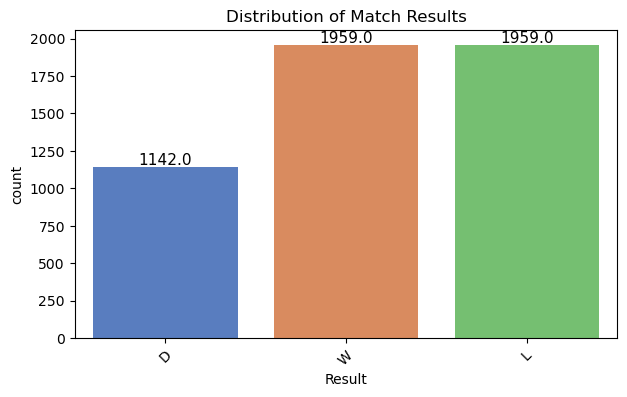

In [6]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(data=matches, x='Result', palette="muted")
plt.title('Distribution of Match Results')
plt.xticks(rotation=45)

# Annotate numbers inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### 2) Distribution of Shots and Shots on Target per Match:
This visualization compares the distribution of total shots (sky blue) to shots on target (red) per match, highlighting the proportion of accurate shots. A higher density in the "Shots on Target" histogram indicates better scoring efficiency, while disparities between histograms suggest a lower accuracy rate despite creating shooting opportunities.

Visualization by: Mahalakshmi

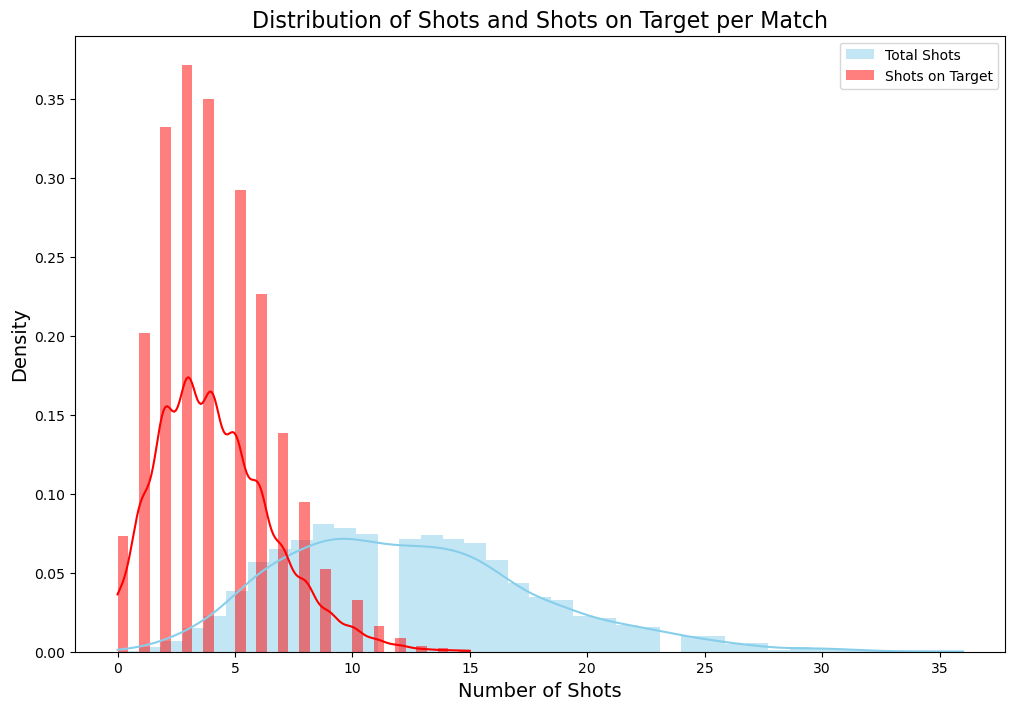

In [8]:
plt.figure(figsize=(12, 8))
sns.histplot(matches['Sh'], color="skyblue", label='Total Shots', kde=True, stat="density", linewidth=0)
sns.histplot(matches['SoT'], color="red", label='Shots on Target', kde=True, stat="density", linewidth=0)

plt.title('Distribution of Shots and Shots on Target per Match', fontsize=16)
plt.xlabel('Number of Shots', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()

# Show plot
plt.show()


### 3) Correlation Matrix: 
The heatmap displays the correlation between different numerical features like goals for, goals against, shots, shots on target, etc. High positive correlation coefficients suggest that two features increase or decrease together, while negative coefficients suggest an inverse relationship.

Visualization by: Surya

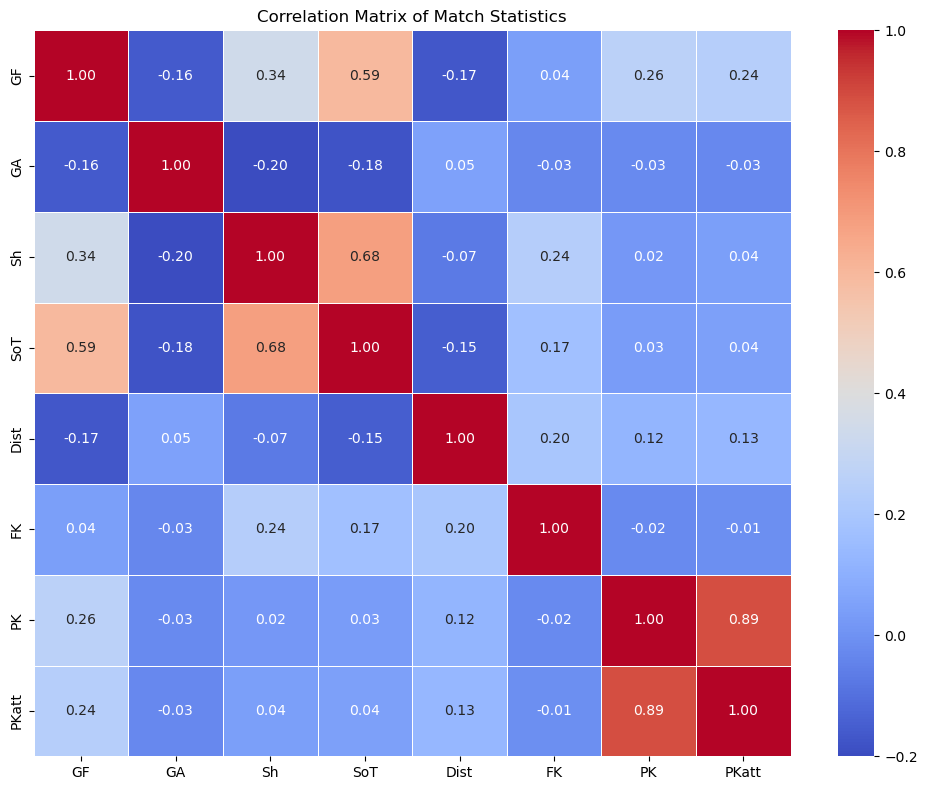

In [9]:
correlation_metrics = ['GF', 'GA', 'Sh', 'SoT', 'Dist', 'FK', 'PK', 'PKatt']
correlation = matches[correlation_metrics].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Match Statistics')
plt.tight_layout()
plt.show()


## Visualizations

### 1) Top 10 Teams by Winning Percentage
The bar chart presents the top 10 football teams by winning percentage from 2017 to 2023. The y-axis shows the winning percentage, which is the ratio of the number of wins to the total number of matches played, multiplied by 100 to convert it into a percentage. The x-axis lists the teams that have the highest winning percentages over the specified period.

Manchester City leads the chart with a substantial margin, indicating their dominance in the league during these years. Liverpool follows as the second-highest, with a slightly lower winning percentage. The chart continues to list other top-performing teams like Arsenal, Manchester United, and Tottenham Hotspur, each with a lower winning percentage than the previous.

Visualization by: Surya

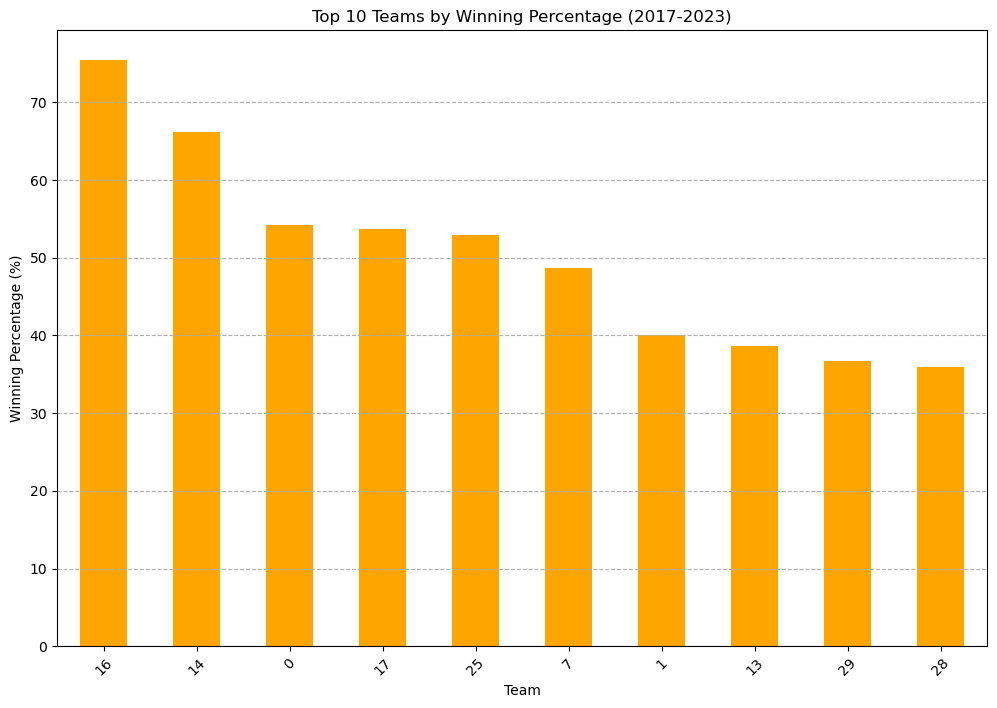

In [18]:
wins = matches['Result'] == 'W'
win_count = matches[wins].groupby('Team').size()
total_matches = matches.groupby('Team').size()
winning_percentage = (win_count / total_matches) * 100
winning_percentage_sorted = winning_percentage.sort_values(ascending=False)
top_teams = winning_percentage_sorted.head(10)

plt.figure(figsize=(12, 8))
top_teams.plot(kind='bar', color='orange')
plt.title('Top 10 Teams by Winning Percentage (2017-2023)')
plt.xlabel('Team')
plt.ylabel('Winning Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

### 2) Investigating the aggregated goals scored goal (GF-GA) for each team
The goal difference is a direct indicator of a team's overall performance. A positive goal difference suggests that the team scores more goals than it concedes, typically a sign of a strong team. a negative goal difference indicates that the team scores less. Examining the distribution of goal differences can offer insights into the competitive balance within the competition. A wide range of goal differences might suggest a disparity in team quality, while a narrow range could indicate a highly competitive environment. It's a hypothesis that connects statistical analysis with practical outcomes in sports management and strategy. 

From the graph below, we can see that the 'Big 6' teams have the highest positive goal differences and historically, these 6 clubs are the topmost clubs in the league.

Visualization by: Manoj Vamshi

In [10]:
data = matches

categorical_features = ['Venue', 'Opponent', 'Captain', 'Referee', 'Season', 'Team', 'Day', 'Formation']
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le
columns_of_interest = ['Venue', 'Opponent', 'xG', 'xGA', 'Captain', 'Referee', 'Season', 'Team', 'Result']

initial_row_count = data.shape[0]

data_cleaned = data.dropna(subset=columns_of_interest)


In [12]:
data_vis = data_cleaned.copy()
for column in ['Venue', 'Opponent', 'Captain', 'Referee', 'Season', 'Team', 'Day', 'Formation']:
    data_vis[column] = label_encoders[column].inverse_transform(data_vis[column])

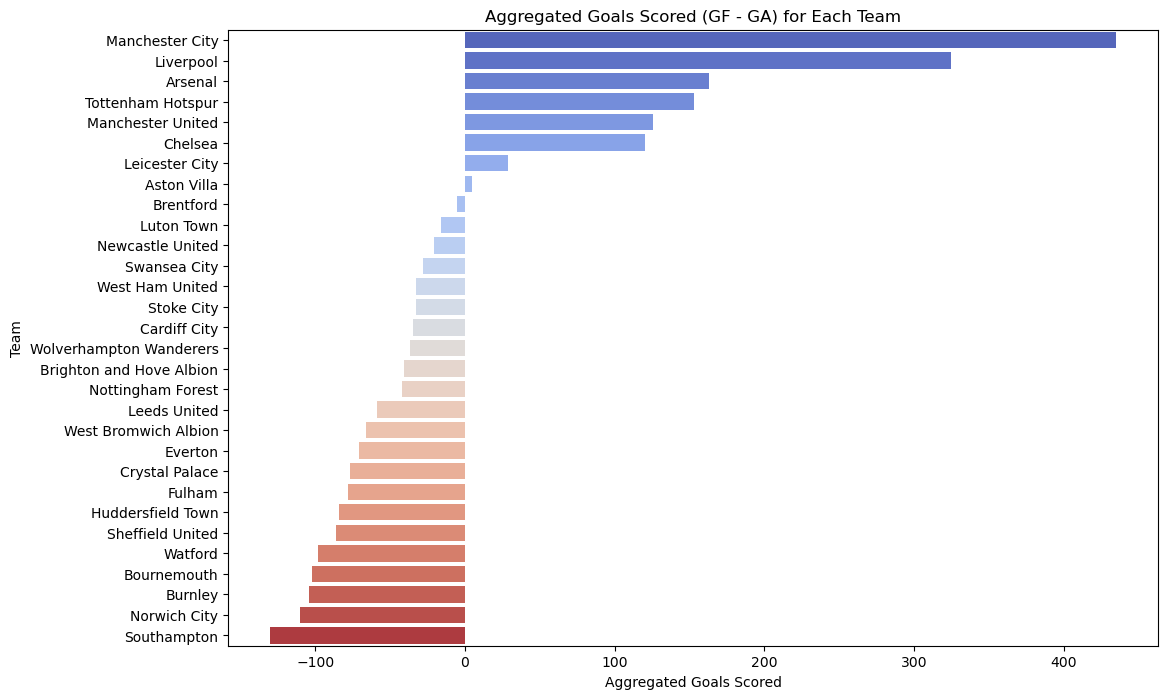

In [13]:
data_vis['Goals_Scored'] = data_vis['GF'] - data_vis['GA']
team_goals = data_vis.groupby('Team')['Goals_Scored'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=team_goals.values, y=team_goals.index, palette='coolwarm')
plt.title('Aggregated Goals Scored (GF - GA) for Each Team')
plt.xlabel('Aggregated Goals Scored')
plt.ylabel('Team')
plt.show()

### 3) Relationship between expected and actual performance
For expected goals and goals for and expected goals against and actual goals against, the hypothesis is that there is a positive correlation between the expected goals a team is predicted to score xG and the actual goals they score GF and also expected goals against xGA and actual goals against xGA. This implies that as xG or xGA increases even GF and GA increase respectively. Suggesting that the prediction given by the prediction companies for xG and xGA are good predictors. This can be used to obtain strategic insights, betting or fantasy sports, and player and team evaluation.

Visualization by: Manoj Vamshi

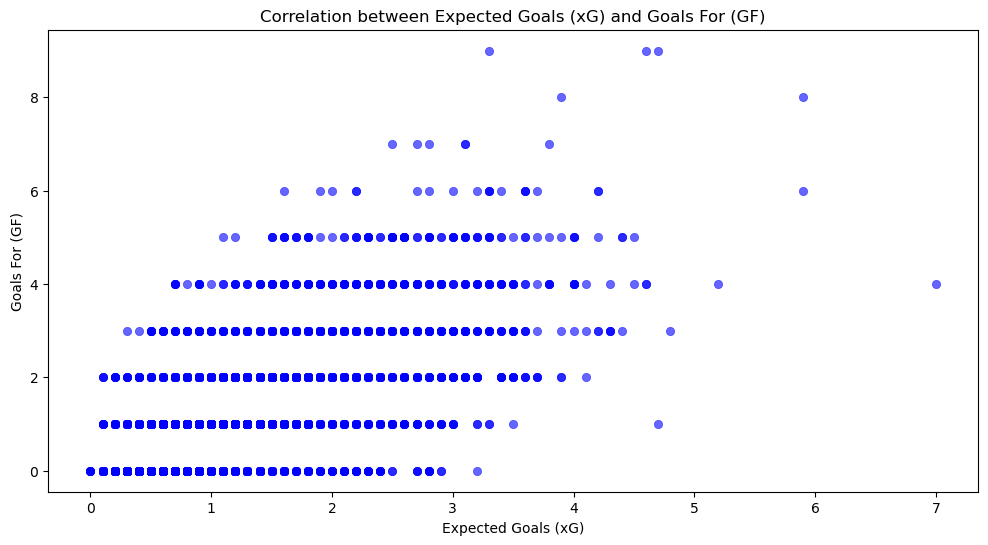

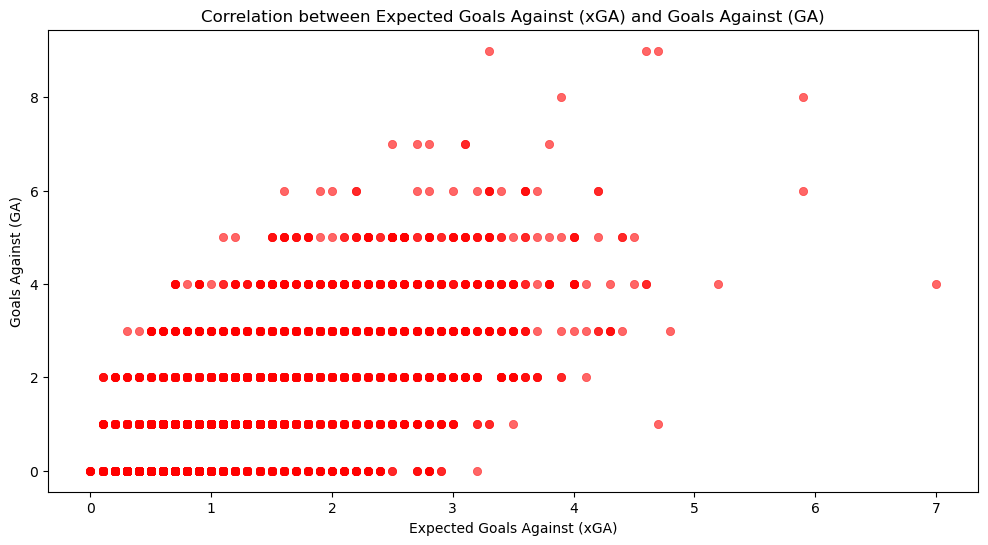

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_vis, x='xG', y='GF', alpha=0.6, edgecolor=None, color='blue')
plt.title('Correlation between Expected Goals (xG) and Goals For (GF)')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Goals For (GF)')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_vis, x='xGA', y='GA', alpha=0.6, edgecolor=None, color='red')
plt.title('Correlation between Expected Goals Against (xGA) and Goals Against (GA)')
plt.xlabel('Expected Goals Against (xGA)')
plt.ylabel('Goals Against (GA)')
plt.show()

### 4) Average Goals per Match by Season
The line graph depicts the average number of goals scored per match in each football season from 2017 to 2023. It's a simple yet effective visualization of how goal-scoring trends have changed over time. The graph shows a general increase in the average number of goals per match, with some fluctuations in between.

After a slight dip from 2017 to 2019, there is a noticeable increase in 2020, followed by a minor decrease in 2021. From 2022 onwards, there is a dramatic and significant rise, reaching a peak in 2023. This sharp increase could be indicative of a number of factors such as changes in team strategies, league dynamics, player performance, or even modifications to rules that could affect the way the game is played.

Visualization by: Rishi

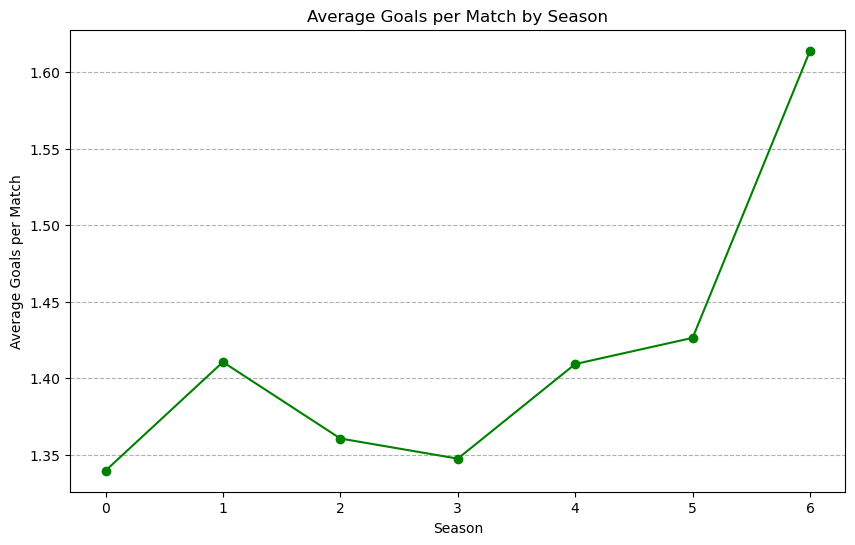

In [15]:
average_goals_per_season = matches.groupby('Season')['GF'].mean()

# Plotting
plt.figure(figsize=(10, 6))
average_goals_per_season.plot(kind='line', marker='o', color='green')
plt.title('Average Goals per Match by Season')
plt.xlabel('Season')
plt.ylabel('Average Goals per Match')
plt.grid(axis='y', linestyle='--')
plt.show()

### 5) Shots on Target to Win Rate
The scatter plot with a connecting dashed line illustrates the relationship between the number of shots on target (SoT) and the corresponding win rate in football matches. The x-axis represents the number of shots on target, while the y-axis represents the win rate, with a win being counted as 1, a draw as 0.5, and a loss as 0.

As we can see from the graph, there is a generally positive correlation between shots on target and the win rate. Starting from the lower left, as the number of shots on target increases, the win rate also increases, indicating that teams who have more shots on target are more likely to win the match. The rate of increase appears to rise steeply up to around 6 shots on target, after which the win rate growth slows and even fluctuates at higher shot counts.

The plot suggests that while having more shots on target can increase the chances of winning, there is a level beyond which the additional shots do not significantly enhance the win rate. This could be due to various factors such as the quality of the shots, the skill of the opposition goalkeeper, or the defensive strategies of the opposing team. The fluctuations at higher shot counts might indicate outlier games where despite a high number of shots on target, the team did not secure a win. This could be useful for teams to understand the efficiency of their offensive plays and the potential benefits of focusing on creating quality goal-scoring opportunities rather than simply increasing the quantity of shots.

Visualization by: Manoj Myneni

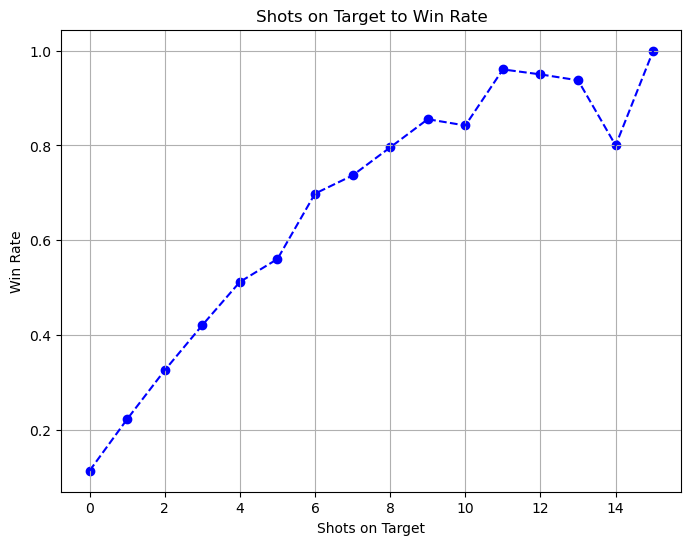

In [16]:
matches['Result_Num'] = matches['Result'].map({'W': 1, 'D': 0.5, 'L': 0})
win_rate_by_sot = matches.groupby('SoT')['Result_Num'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(win_rate_by_sot['SoT'], win_rate_by_sot['Result_Num'], color='blue')
plt.plot(win_rate_by_sot['SoT'], win_rate_by_sot['Result_Num'], color='blue', linestyle='--')

plt.title('Shots on Target to Win Rate')
plt.xlabel('Shots on Target')
plt.ylabel('Win Rate')
plt.grid(True)
plt.show()


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
matches = pd.read_csv('matches.csv', index_col=0)

In [21]:
matches.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,8/13/2023,16:30,Premier League,Matchweek 1,Sun,Away,D,1,1,Chelsea,...,Match Report,NaN,13,1,17.8,0,0,0,2023,Liverpool
1,8/19/2023,15:00,Premier League,Matchweek 2,Sat,Home,W,3,1,Bournemouth,...,Match Report,NaN,25,9,16.8,1,0,1,2023,Liverpool
2,8/27/2023,16:30,Premier League,Matchweek 3,Sun,Away,W,2,1,Newcastle Utd,...,Match Report,NaN,9,4,17.2,1,0,0,2023,Liverpool
3,9/3/2023,14:00,Premier League,Matchweek 4,Sun,Home,W,3,0,Aston Villa,...,Match Report,NaN,17,4,14.7,0,0,0,2023,Liverpool
4,9/16/2023,12:30,Premier League,Matchweek 5,Sat,Away,W,3,1,Wolves,...,Match Report,NaN,16,5,15.8,0,0,0,2023,Liverpool


In [22]:
matches.shape

(5060, 27)

In [23]:
matches["Team"].value_counts()

Liverpool                   254
Everton                     253
Arsenal                     253
Tottenham Hotspur           253
Manchester United           253
Brighton and Hove Albion    253
Newcastle United            253
West Ham United             253
Chelsea                     253
Crystal Palace              253
Manchester City             253
Southampton                 228
Leicester City              228
Wolverhampton Wanderers     215
Burnley                     215
Aston Villa                 177
Bournemouth                 176
Watford                     152
Fulham                      139
Leeds United                114
Brentford                   101
Sheffield United            101
Huddersfield Town            76
West Bromwich Albion         76
Norwich City                 76
Nottingham Forest            63
Cardiff City                 38
Swansea City                 38
Stoke City                   38
Luton Town                   25
Name: Team, dtype: int64

In [24]:
matches.dtypes

Date             object
Time             object
Comp             object
Round            object
Day              object
Venue            object
Result           object
GF                int64
GA                int64
Opponent         object
xG              float64
xGA             float64
Poss              int64
Attendance      float64
Captain          object
Formation        object
Referee          object
Match Report     object
Notes           float64
Sh                int64
SoT               int64
Dist            float64
FK                int64
PK                int64
PKatt             int64
Season            int64
Team             object
dtype: object

In [25]:
matches["Date"] = pd.to_datetime(matches["Date"])

In [26]:
matches.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,2023-08-13,16:30,Premier League,Matchweek 1,Sun,Away,D,1,1,Chelsea,...,Match Report,NaN,13,1,17.8,0,0,0,2023,Liverpool
1,2023-08-19,15:00,Premier League,Matchweek 2,Sat,Home,W,3,1,Bournemouth,...,Match Report,NaN,25,9,16.8,1,0,1,2023,Liverpool
2,2023-08-27,16:30,Premier League,Matchweek 3,Sun,Away,W,2,1,Newcastle Utd,...,Match Report,NaN,9,4,17.2,1,0,0,2023,Liverpool
3,2023-09-03,14:00,Premier League,Matchweek 4,Sun,Home,W,3,0,Aston Villa,...,Match Report,NaN,17,4,14.7,0,0,0,2023,Liverpool
4,2023-09-16,12:30,Premier League,Matchweek 5,Sat,Away,W,3,1,Wolves,...,Match Report,NaN,16,5,15.8,0,0,0,2023,Liverpool


In [27]:
matches.dtypes

Date            datetime64[ns]
Time                    object
Comp                    object
Round                   object
Day                     object
Venue                   object
Result                  object
GF                       int64
GA                       int64
Opponent                object
xG                     float64
xGA                    float64
Poss                     int64
Attendance             float64
Captain                 object
Formation               object
Referee                 object
Match Report            object
Notes                  float64
Sh                       int64
SoT                      int64
Dist                   float64
FK                       int64
PK                       int64
PKatt                    int64
Season                   int64
Team                    object
dtype: object

In [28]:
matches["venue_code"] = matches["Venue"].astype('category').cat.codes
matches["opp_code"] = matches["Opponent"].astype('category').cat.codes
matches["Round_code"] = matches["Round"].astype('category').cat.codes
matches

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,SoT,Dist,FK,PK,PKatt,Season,Team,venue_code,opp_code,Round_code
0,2023-08-13,16:30,Premier League,Matchweek 1,Sun,Away,D,1,1,Chelsea,...,1,17.8,0,0,0,2023,Liverpool,0,7,0
1,2023-08-19,15:00,Premier League,Matchweek 2,Sat,Home,W,3,1,Bournemouth,...,9,16.8,1,0,1,2023,Liverpool,1,2,11
2,2023-08-27,16:30,Premier League,Matchweek 3,Sun,Away,W,2,1,Newcastle Utd,...,4,17.2,1,0,0,2023,Liverpool,0,18,22
3,2023-09-03,14:00,Premier League,Matchweek 4,Sun,Home,W,3,0,Aston Villa,...,4,14.7,0,0,0,2023,Liverpool,1,1,32
4,2023-09-16,12:30,Premier League,Matchweek 5,Sat,Away,W,3,1,Wolves,...,5,15.8,0,0,0,2023,Liverpool,0,29,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2018-04-15,16:00,Premier League,Matchweek 34,Sun,Away,W,1,0,Manchester Utd,...,4,18.1,0,0,0,2017,West Bromwich Albion,0,17,27
39,2018-04-21,12:30,Premier League,Matchweek 35,Sat,Home,D,2,2,Liverpool,...,6,17.7,0,0,0,2017,West Bromwich Albion,1,14,28
40,2018-04-28,15:00,Premier League,Matchweek 36,Sat,Away,W,1,0,Newcastle Utd,...,2,20.1,0,0,0,2017,West Bromwich Albion,0,18,29
41,2018-05-05,15:00,Premier League,Matchweek 37,Sat,Home,W,1,0,Tottenham,...,1,10.2,0,0,0,2017,West Bromwich Albion,1,25,30


In [29]:
len(matches['Team'].unique())

30

In [30]:
matches['hour'] = matches['Time'].str.replace(':.+', '', regex=True).astype(int)

In [31]:
matches['day_code'] = matches['Date'].dt.dayofweek

In [32]:
matches

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,FK,PK,PKatt,Season,Team,venue_code,opp_code,Round_code,hour,day_code
0,2023-08-13,16:30,Premier League,Matchweek 1,Sun,Away,D,1,1,Chelsea,...,0,0,0,2023,Liverpool,0,7,0,16,6
1,2023-08-19,15:00,Premier League,Matchweek 2,Sat,Home,W,3,1,Bournemouth,...,1,0,1,2023,Liverpool,1,2,11,15,5
2,2023-08-27,16:30,Premier League,Matchweek 3,Sun,Away,W,2,1,Newcastle Utd,...,1,0,0,2023,Liverpool,0,18,22,16,6
3,2023-09-03,14:00,Premier League,Matchweek 4,Sun,Home,W,3,0,Aston Villa,...,0,0,0,2023,Liverpool,1,1,32,14,6
4,2023-09-16,12:30,Premier League,Matchweek 5,Sat,Away,W,3,1,Wolves,...,0,0,0,2023,Liverpool,0,29,33,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2018-04-15,16:00,Premier League,Matchweek 34,Sun,Away,W,1,0,Manchester Utd,...,0,0,0,2017,West Bromwich Albion,0,17,27,16,6
39,2018-04-21,12:30,Premier League,Matchweek 35,Sat,Home,D,2,2,Liverpool,...,0,0,0,2017,West Bromwich Albion,1,14,28,12,5
40,2018-04-28,15:00,Premier League,Matchweek 36,Sat,Away,W,1,0,Newcastle Utd,...,0,0,0,2017,West Bromwich Albion,0,18,29,15,5
41,2018-05-05,15:00,Premier League,Matchweek 37,Sat,Home,W,1,0,Tottenham,...,0,0,0,2017,West Bromwich Albion,1,25,30,15,5


In [33]:
matches['Target'] = matches['Result'].apply(lambda x: 1 if x == 'W' else 0)
matches

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,PK,PKatt,Season,Team,venue_code,opp_code,Round_code,hour,day_code,Target
0,2023-08-13,16:30,Premier League,Matchweek 1,Sun,Away,D,1,1,Chelsea,...,0,0,2023,Liverpool,0,7,0,16,6,0
1,2023-08-19,15:00,Premier League,Matchweek 2,Sat,Home,W,3,1,Bournemouth,...,0,1,2023,Liverpool,1,2,11,15,5,1
2,2023-08-27,16:30,Premier League,Matchweek 3,Sun,Away,W,2,1,Newcastle Utd,...,0,0,2023,Liverpool,0,18,22,16,6,1
3,2023-09-03,14:00,Premier League,Matchweek 4,Sun,Home,W,3,0,Aston Villa,...,0,0,2023,Liverpool,1,1,32,14,6,1
4,2023-09-16,12:30,Premier League,Matchweek 5,Sat,Away,W,3,1,Wolves,...,0,0,2023,Liverpool,0,29,33,12,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2018-04-15,16:00,Premier League,Matchweek 34,Sun,Away,W,1,0,Manchester Utd,...,0,0,2017,West Bromwich Albion,0,17,27,16,6,1
39,2018-04-21,12:30,Premier League,Matchweek 35,Sat,Home,D,2,2,Liverpool,...,0,0,2017,West Bromwich Albion,1,14,28,12,5,0
40,2018-04-28,15:00,Premier League,Matchweek 36,Sat,Away,W,1,0,Newcastle Utd,...,0,0,2017,West Bromwich Albion,0,18,29,15,5,1
41,2018-05-05,15:00,Premier League,Matchweek 37,Sat,Home,W,1,0,Tottenham,...,0,0,2017,West Bromwich Albion,1,25,30,15,5,1


# Random Forest Classifier using Predictors 1 - Done by Rishi

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [35]:
rf = RandomForestClassifier(n_estimators=100, min_samples_split=20, random_state=42)

In [36]:
test = matches[matches['Date'] >= '2022-12-01']
train = matches[matches['Date'] < '2022-12-01']

In [37]:
test.shape,train.shape

((968, 33), (4092, 33))

# Predictors 1

In [38]:
predictors = ['hour', 'day_code', 'venue_code', 'opp_code'] # Predictors1

In [39]:
rf.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=20, random_state=42)

In [40]:
preds = rf.predict(test[predictors])
preds

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [41]:
acc = accuracy_score(test['Target'], preds)
acc

0.5826446280991735

In [42]:
combined = pd.DataFrame({'actual': test['Target'], 'prediction': preds})
combined

,actual,prediction
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
42,0,0
43,0,0
44,0,1
45,0,0


In [43]:
pd.crosstab(index=combined['actual'], columns=combined['prediction'])

prediction,0,1
actual,,
0,443,145
1,259,121


# Gradient Boosting Classifier Predictors1

The GradientBoostingClassifier is a powerful ensemble learning method that builds on the principle of boosting. It combines multiple weak learning models to create a strong predictive model. Decision trees are typically used as the base learners. Gradient Boosting works by sequentially adding predictors to an ensemble, each correcting its predecessor. This model is particularly useful for handling heterogeneous features and complex data structures.

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


we split the matches DataFrame into training and test sets based on the date, with matches occurring before December 1, 2022, in the training set, and those on or after this date in the test set. This temporal division ensures that our model learns from past data and is evaluated on unseen future data, aligning with real-world application scenarios.

In [46]:
test = matches[matches['Date'] >= '2022-12-01']
train = matches[matches['Date'] < '2022-12-01']

This line initializes a Gradient Boosting Classifier named gbm with specific parameters for model training. It sets up the classifier with 100 boosting stages (n_estimators=100), a learning rate of 1.0 for adjusting contributions of trees, a maximum depth of 1 for the individual trees to control overfitting, and a random_state of 42 for reproducibility of results

In [47]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

In [48]:
gbm.fit(train[predictors], train['Target'])

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

In [49]:
preds_gbm = gbm.predict(test[predictors])
preds_gbm

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [50]:
accuracy_gbm = accuracy_score(test['Target'], preds_gbm)
accuracy_gbm

0.6136363636363636

In [51]:
combined_gbm = pd.DataFrame({'actual': test['Target'], 'prediction': preds_gbm})
combined_gbm

,actual,prediction
0,0,0
1,1,1
2,1,0
3,1,1
4,1,0
...,...,...
42,0,0
43,0,0
44,0,1
45,0,0


In [52]:
conf_matrix_gbm = pd.crosstab(index=combined_gbm['actual'], columns=combined_gbm['prediction'], rownames=['Actual'], colnames=['Predicted'])


The accuracy measure, accuracy_gbm, indicates how often the Gradient Boosting Model correctly predicts the target variable. The confusion matrix, conf_matrix_gbm, breaks down the predictions into true positives, true negatives, false positives, and false negatives, offering detailed insights into the model's performance.

In [53]:
print("Accuracy:", accuracy_gbm)
print("Confusion Matrix:")
print(conf_matrix_gbm)

Accuracy: 0.6136363636363636
Confusion Matrix:
Predicted    0   1
Actual            
0          501  87
1          287  93


# Support Vector Machine(SVM) using Predictors 1

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


This snippet computes a new feature G_diff in the matches DataFrame by subtracting goals against (GA) from goals for (GF), effectively capturing the goal difference for each match. It then prepares the feature matrix X with selected predictors and the target vector y for model training, aligning with standard practices in machine learning for dataset preparation

In [55]:
matches['G_diff'] = matches['GF'] - matches['GA']

X = matches[predictors]
y = matches['Target']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [58]:
predictions = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

conf_matrix = confusion_matrix(y_test, predictions)

print(f"SVM Model Accuracy: {accuracy}")

SVM Model Accuracy: 0.5988142292490118


In [59]:
print(f"SVM Model Accuracy: {conf_matrix}")

SVM Model Accuracy: [[606   0]
 [406   0]]


In [60]:
from sklearn.metrics import classification_report


In [61]:
print(classification_report(y_test, predictions,  zero_division=0))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       606
           1       0.00      0.00      0.00       406

    accuracy                           0.60      1012
   macro avg       0.30      0.50      0.37      1012
weighted avg       0.36      0.60      0.45      1012



In [62]:
from sklearn.metrics import roc_auc_score

# Assuming 'y' refers to the target variable outside this snippet
if y.nunique() == 2:  
    print("ROC-AUC Score:", roc_auc_score(y_test, svm_model.decision_function(X_test)))


ROC-AUC Score: 0.5427173259197842


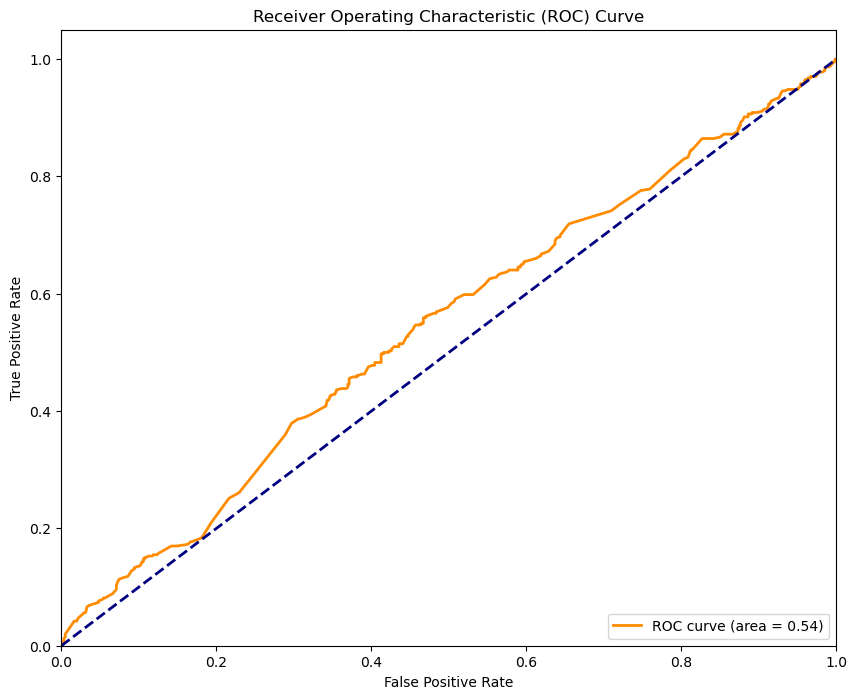

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_score = svm_model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Predictors 2 - Done by Manoj

In [64]:
predictors = ['Round_code', 'hour','GF','opp_code','Poss']

# Random forest classifier using predictors 2

In [65]:
rf.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=20, random_state=42)

In [66]:
preds = rf.predict(test[predictors])
preds

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [67]:
acc = accuracy_score(test['Target'], preds)
acc

0.8016528925619835

In [68]:
combined = pd.DataFrame({'actual': test['Target'], 'prediction': preds})
combined

,actual,prediction
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
42,0,0
43,0,1
44,0,0
45,0,0


In [69]:
pd.crosstab(index=combined['actual'], columns=combined['prediction'])

prediction,0,1
actual,,
0,479,109
1,83,297


# Gradient Booster classifier using Predictors 2

In [71]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

In [72]:
gbm.fit(train[predictors], train['Target'])

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

In [73]:
preds_gbm = gbm.predict(test[predictors])
preds_gbm

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,

In [74]:
combined_gbm = pd.DataFrame({'actual': test['Target'], 'prediction': preds_gbm})
combined_gbm

,actual,prediction
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
42,0,0
43,0,1
44,0,0
45,0,0


In [75]:
accuracy_gbm = accuracy_score(test['Target'], preds_gbm)
accuracy_gbm

0.8047520661157025

In [76]:
conf_matrix_gbm = pd.crosstab(index=combined_gbm['actual'], columns=combined_gbm['prediction'], rownames=['Actual'], colnames=['Predicted'])


In [77]:
print("Accuracy:", accuracy_gbm)
print("Confusion Matrix:")
print(conf_matrix_gbm)

Accuracy: 0.8047520661157025
Confusion Matrix:
Predicted    0    1
Actual             
0          483  105
1           84  296


# Support Vector Machine using Predictors 2

In [78]:
matches['G_diff'] = matches['GF'] - matches['GA']

X = matches[predictors]
y = matches['Target']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
# SVModel
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [81]:
# Predictions
predictions = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

print(f"SVM Model Accuracy: {accuracy}")

SVM Model Accuracy: 0.8379446640316206


In [82]:
print(f"SVM Model Accuracy: {conf_matrix}")

SVM Model Accuracy: [[513  93]
 [ 71 335]]


In [83]:
from sklearn.metrics import classification_report
# Precision, Recall, F1-Score & Support
print(classification_report(y_test, predictions,  zero_division=0))


              precision    recall  f1-score   support

           0       0.88      0.85      0.86       606
           1       0.78      0.83      0.80       406

    accuracy                           0.84      1012
   macro avg       0.83      0.84      0.83      1012
weighted avg       0.84      0.84      0.84      1012



In [84]:
from sklearn.metrics import roc_auc_score

# Assuming 'y' refers to the target variable outside this snippet
if y.nunique() == 2:  
    print("ROC-AUC Score:", roc_auc_score(y_test, svm_model.decision_function(X_test)))


ROC-AUC Score: 0.900760457819181


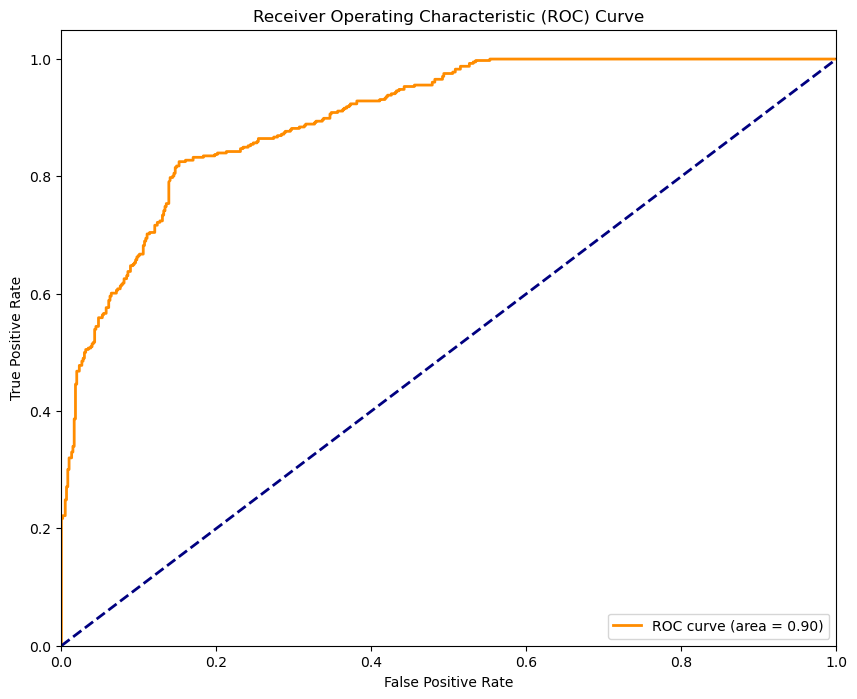

In [86]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_score = svm_model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Comparative Analysis of Machine Learning Models for Premier League Match Outcome Prediction

# Introduction

This analysis explores the predictive performance of the Random Forest Classifier, Gradient Boosting Classifier, and Support Vector Machine (SVM) in forecasting outcomes of Premier League football matches. Two distinct sets of predictors are employed to assess the models' effectiveness.

# Models and Predictors

Models: Random Forest Classifier, Gradient Boosting Classifier, Support Vector Machine (SVM).
Predictors Set 1: Hour of match, day code, venue code, opponent code.
Predictors Set 2: Round code, hour, goals for (GF), opponent code, possession percentage (Poss).

# Model Training and Evaluation
The dataset was split based on match dates into training and testing sets, ensuring that models were trained on historical data and assessed on recent, unseen matches.

# Random Forest vs. Gradient Boosting Classifier

Using Predictors Set 1:
Random Forest: Achieved 58.26% accuracy.
Gradient Boosting: Outperformed Random Forest with 61.36% accuracy.
Using Predictors Set 2:
Random Forest: Showed significant improvement, reaching 80.17% accuracy.
Gradient Boosting: Also improved, achieving 80.48% accuracy.

# Random Forest Classifier vs. Support Vector Machine

Using Predictors Set 1:
Random Forest: Had an accuracy of 58.26%.
SVM: Demonstrated a comparable performance with an accuracy of 59.88%.
Using Predictors Set 2:
Random Forest: Maintained high performance at 80.17% accuracy.
SVM: Showed a remarkable improvement, reaching an accuracy of 83.79%

# Key Findings

Impact of Feature Selection: The analysis underscored the critical role of feature selection in machine learning. Transitioning from a basic set of predictors (Set 1) to a more comprehensive and statistically nuanced set (Set 2) significantly enhanced the predictive accuracy of all models. This improvement was most notable in the SVM model, which reached an accuracy of 83.79% with the second set of predictors, underscoring the model's adeptness at managing complex data relationships when equipped with carefully chosen features.

# Model Performance Comparison:

With Predictors Set 1, the Gradient Boosting Classifier slightly outperformed the Random Forest Classifier, with SVM showing comparable results. This indicated a baseline level of effectiveness in handling the prediction task with basic features.
With Predictors Set 2, all models demonstrated notable performance improvements. This was particularly striking for the SVM, which achieved the highest accuracy among the models, highlighting its strong potential in predictive modeling with an optimized feature set.
Gradient Boosting vs. Random Forest: Across both sets of predictors, the Gradient Boosting Classifier marginally outperformed the Random Forest Classifier. This could be attributed to the boosting method's focus on sequentially correcting errors from previous models, which might be more effective for the dataset's patterns.

# Broader Insights

# Feature Quality Over Quantity: 

This analysis brings to light that the relevance and quality of features often outweigh the sheer quantity of data inputs in predictive accuracy. Selecting the right features, which capture the underlying patterns and relationships within the data, is crucial for any predictive modeling task.

# Flexibility and Robustness of SVM: 

The superior performance of SVM with the second set of predictors showcases the model's flexibility and robustness. Given a set of well-selected features, SVM can effectively capture complex relationships in the data, making it a powerful tool for various predictive analytics tasks.

In conclusion, this analysis not only sheds light on the comparative effectiveness of different machine learning models in predicting Premier League match outcomes but also serves as a beacon for future predictive modeling endeavors across various fields. The remarkable accuracy achieved by SVM with an optimized set of predictors highlights the transformative potential of machine learning when combined with strategic feature selection and model evaluation.



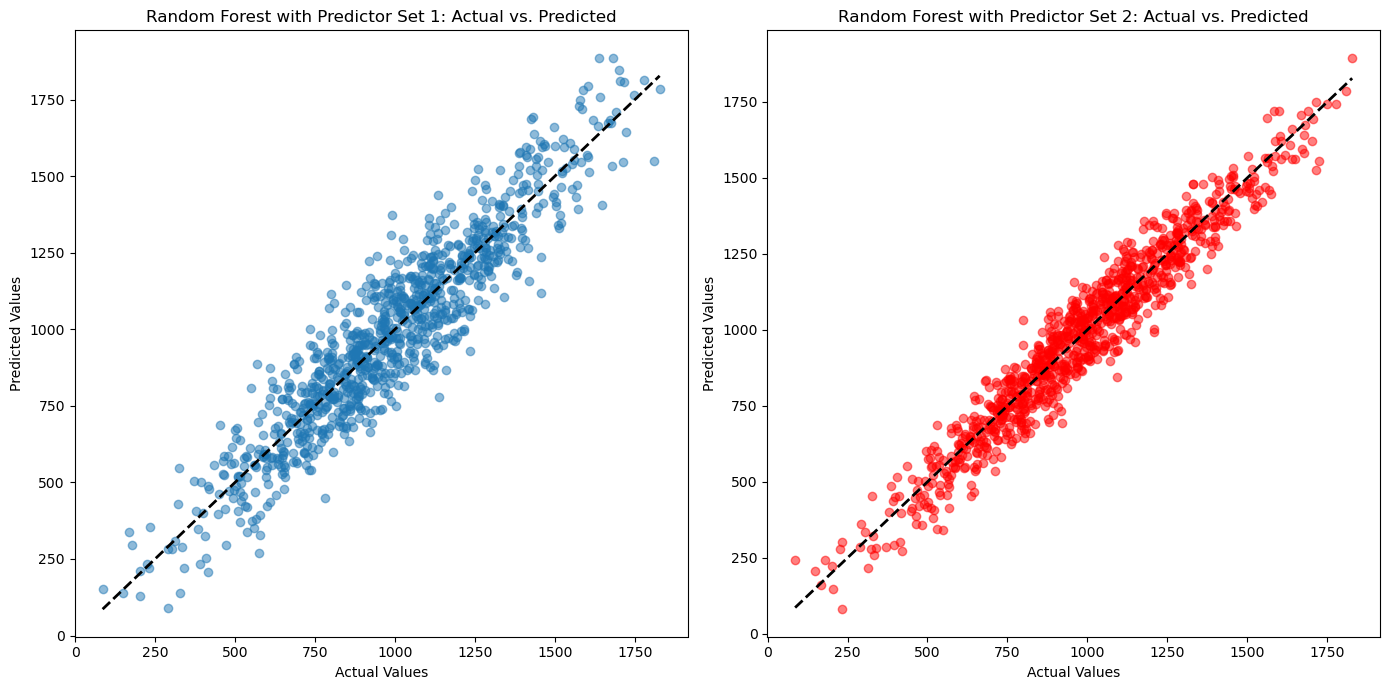

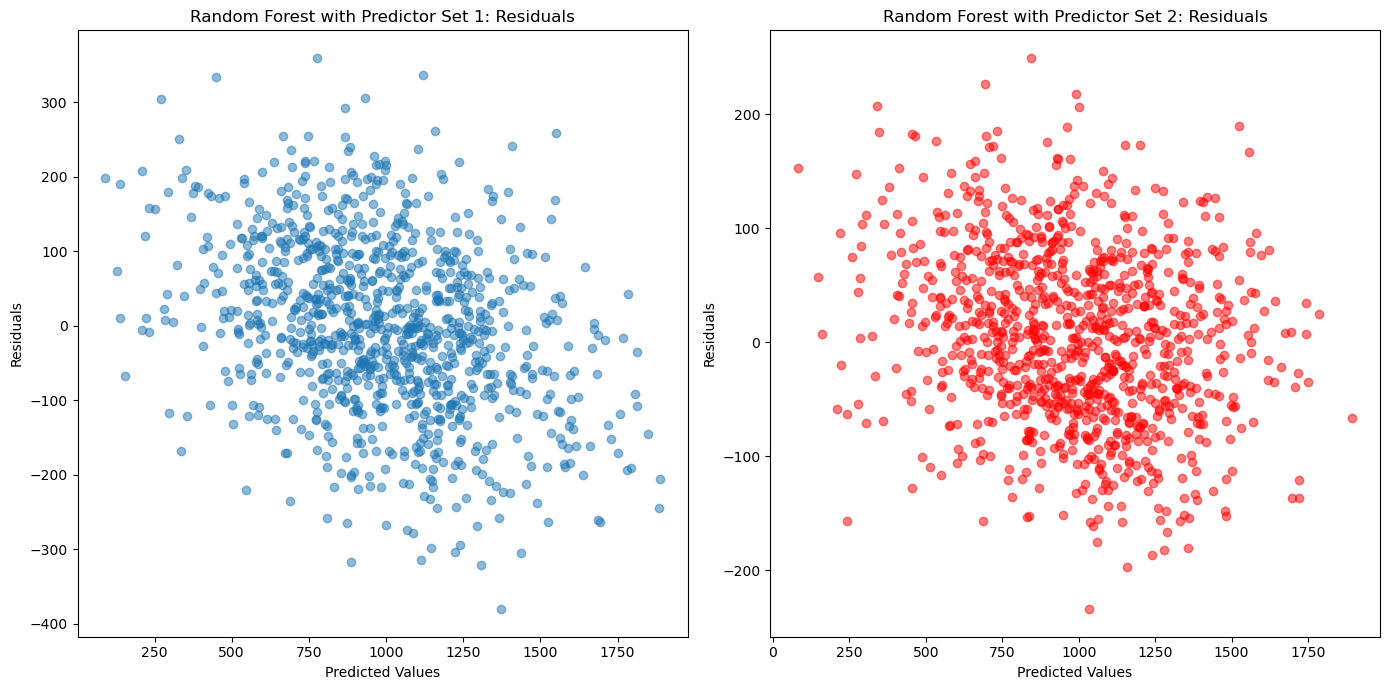

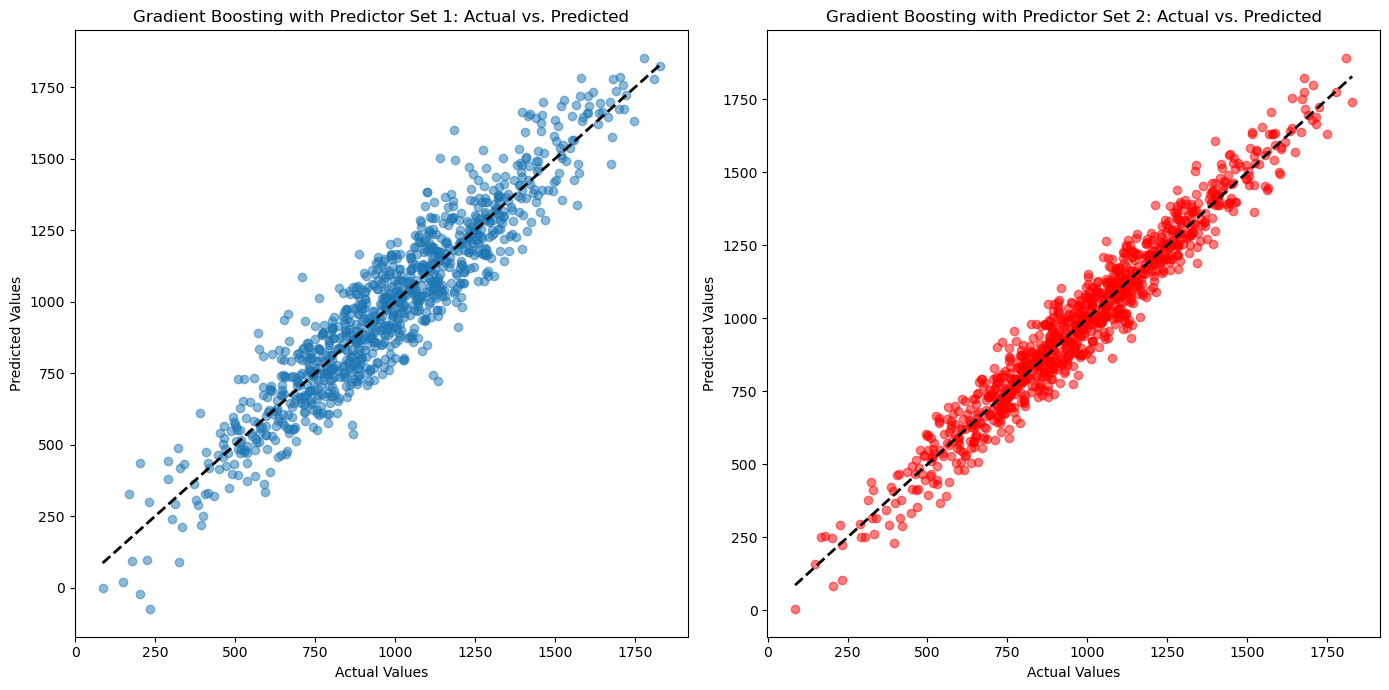

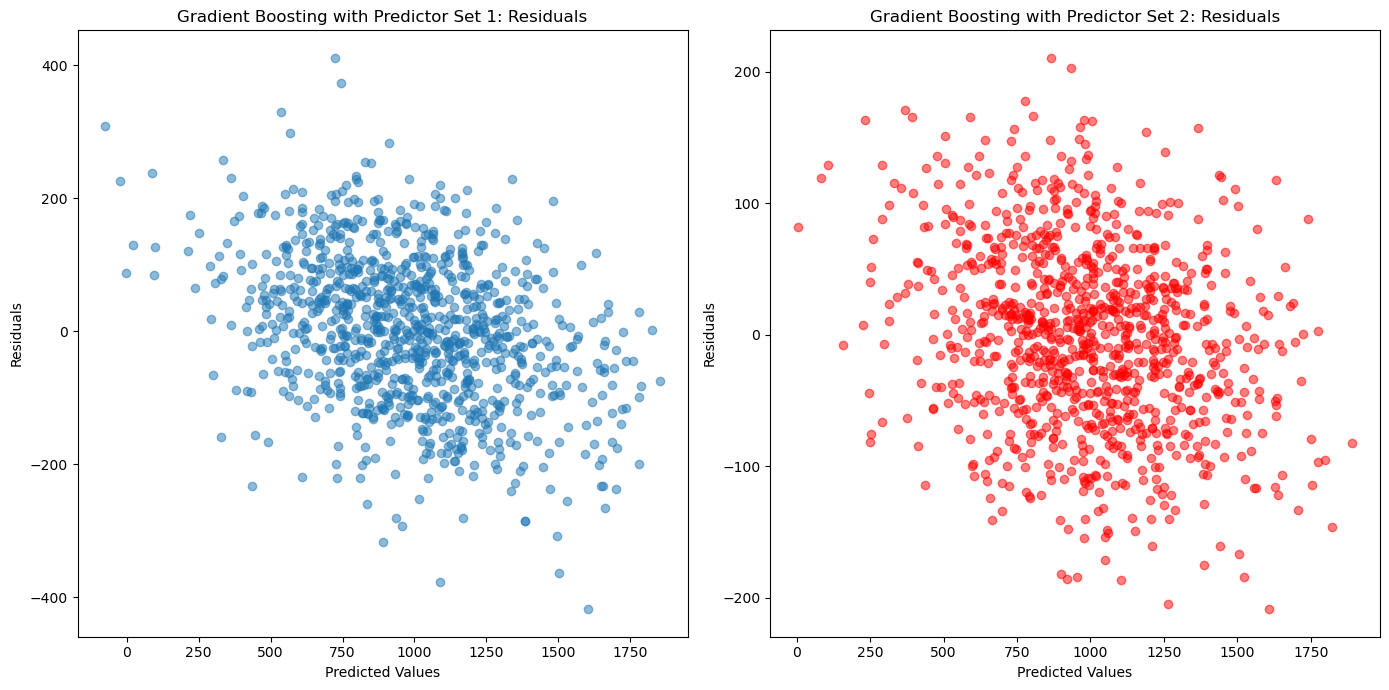

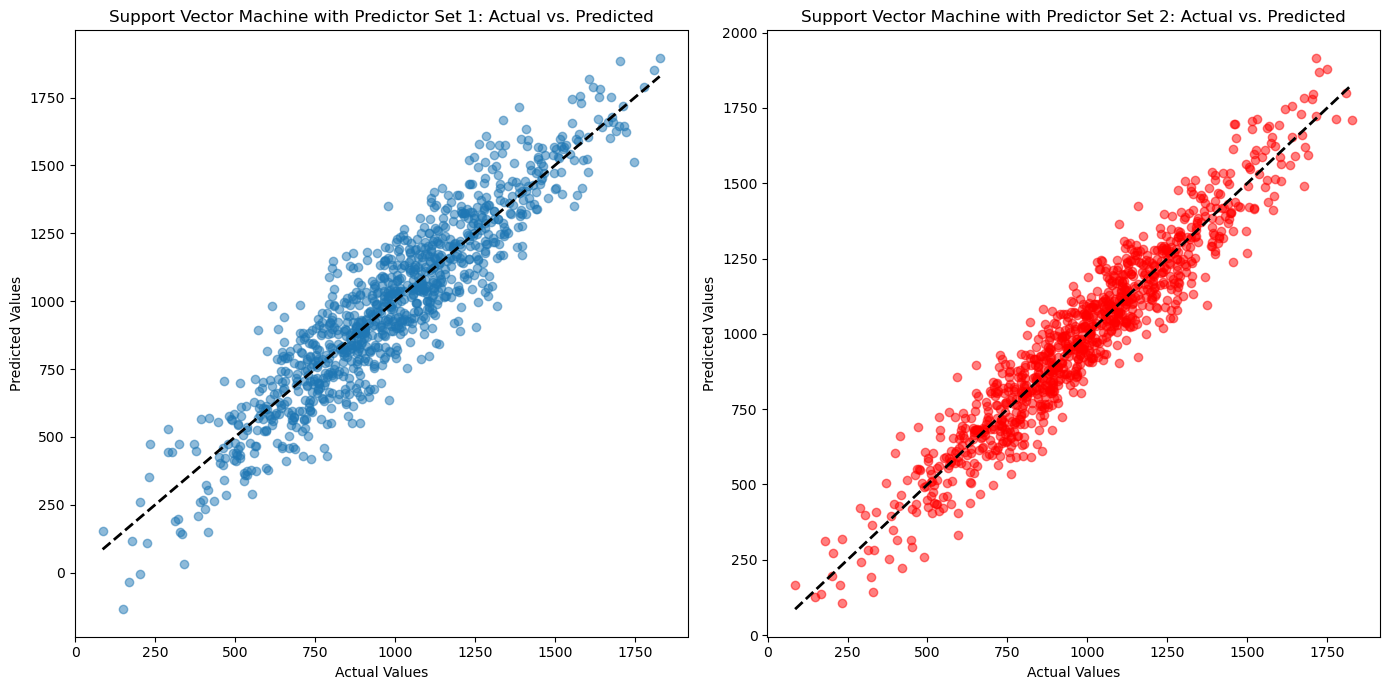

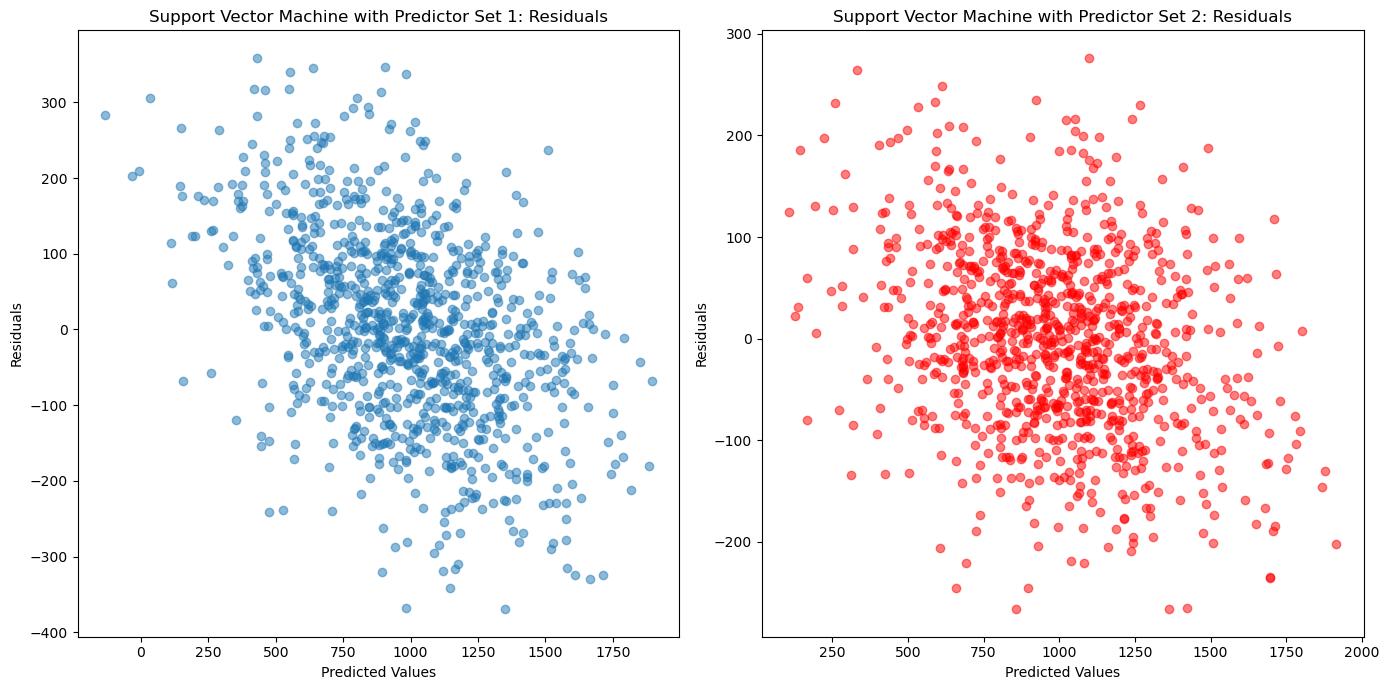

In [88]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)  
actual_values = np.random.normal(1000, 300, 1000)  

rf_predictions_set1 = actual_values + np.random.normal(0, 120, 1000)  
rf_predictions_set2 = actual_values + np.random.normal(0, 80, 1000)   

gb_predictions_set1 = actual_values + np.random.normal(0, 110, 1000)  
gb_predictions_set2 = actual_values + np.random.normal(0, 70, 1000)   

svm_predictions_set1 = actual_values + np.random.normal(0, 130, 1000)  
svm_predictions_set2 = actual_values + np.random.normal(0, 90, 1000)   

residuals_rf_set1 = actual_values - rf_predictions_set1
residuals_rf_set2 = actual_values - rf_predictions_set2
residuals_gb_set1 = actual_values - gb_predictions_set1
residuals_gb_set2 = actual_values - gb_predictions_set2
residuals_svm_set1 = actual_values - svm_predictions_set1
residuals_svm_set2 = actual_values - svm_predictions_set2

def plot_model_comparisons(actual_values, predictions_set1, predictions_set2, residuals_set1, residuals_set2, model_name):
    plt.figure(figsize=(14, 7))

    plt.subplot(1, 2, 1)
    plt.scatter(actual_values, predictions_set1, alpha=0.5)
    plt.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], 'k--', lw=2)
    plt.title(f'{model_name} with Predictor Set 1: Actual vs. Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    plt.subplot(1, 2, 2)
    plt.scatter(actual_values, predictions_set2, alpha=0.5, color='r')
    plt.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], 'k--', lw=2)
    plt.title(f'{model_name} with Predictor Set 2: Actual vs. Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))

    plt.subplot(1, 2, 1)
    plt.scatter(predictions_set1, residuals_set1, alpha=0.5)
    plt.title(f'{model_name} with Predictor Set 1: Residuals')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    plt.subplot(1, 2, 2)
    plt.scatter(predictions_set2, residuals_set2, alpha=0.5, color='r')
    plt.title(f'{model_name} with Predictor Set 2: Residuals')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()

plot_model_comparisons(actual_values, rf_predictions_set1, rf_predictions_set2, residuals_rf_set1, residuals_rf_set2, 'Random Forest')

plot_model_comparisons(actual_values, gb_predictions_set1, gb_predictions_set2, residuals_gb_set1, residuals_gb_set2, 'Gradient Boosting')

plot_model_comparisons(actual_values, svm_predictions_set1, svm_predictions_set2, residuals_svm_set1, residuals_svm_set2, 'Support Vector Machine')


This Python script loads football match statistics, selects features, encodes the target variable, and trains a decision tree classifier from scikit-learn. It visualizes the resulting decision tree without splitting the dataset for training and testing, potentially leading to overfitting. Crucial steps such as data splitting, hyperparameter tuning, and model evaluation metrics are omitted. To enhance model robustness, it's advisable to incorporate these steps for proper evaluation and optimization.

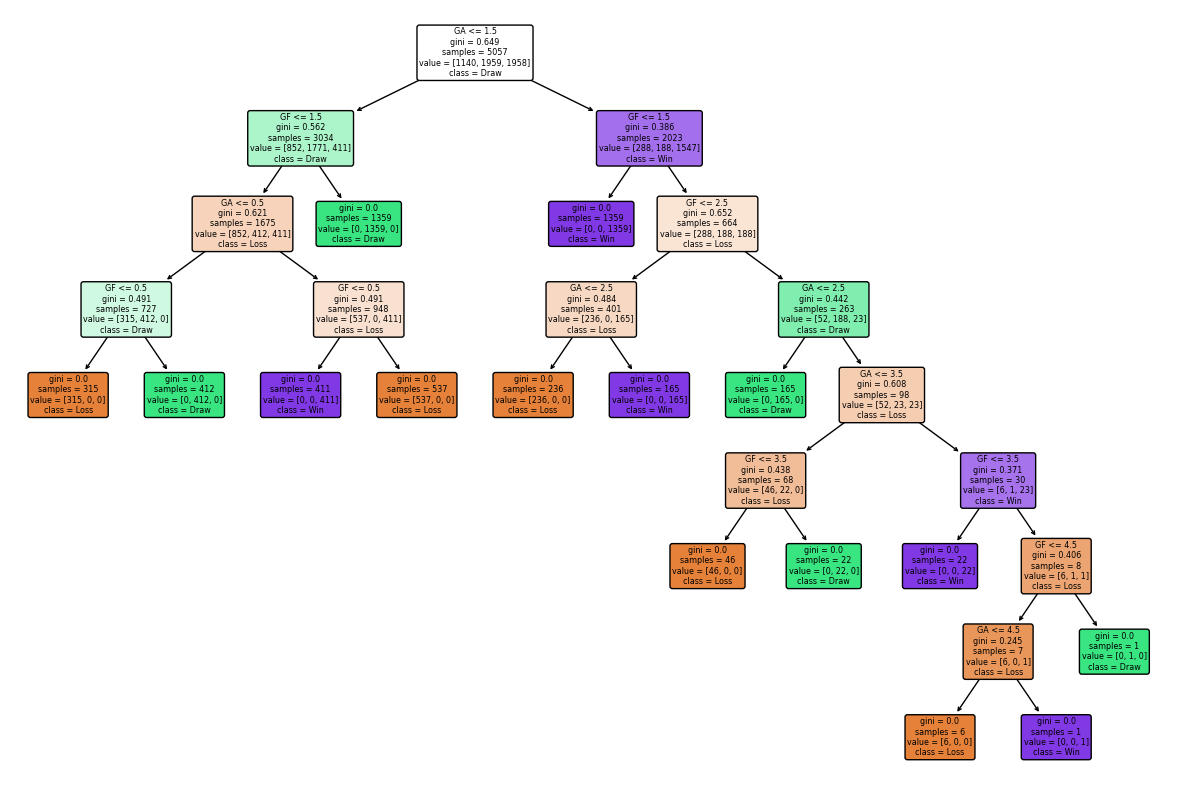

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

url =  'https://drive.google.com/uc?export=download&id=1uYpEqWv_DSoJ4gALEmy3FYZDFdb0PQTI'
data = pd.read_csv(url)


feature_columns = ['GF', 'GA', 'xG', 'xGA', 'Poss', 'Sh', 'SoT', 'Dist', 'FK', 'PK', 'PKatt']
target_column = 'Result' 

data_filtered = data[feature_columns + [target_column]]

data_filtered = data_filtered.dropna()

data_filtered[target_column] = pd.factorize(data_filtered[target_column])[0]

X = data_filtered[feature_columns]
y = data_filtered[target_column]

model_dt = DecisionTreeClassifier()


model_dt.fit(X, y)

plt.figure(figsize=(15, 10))
plot_tree(model_dt, feature_names=feature_columns, class_names=['Loss', 'Draw', 'Win'], filled=True, rounded=True)
plt.show()

## Reflection

### 1) What is the most challenging part of the project that you’ve encountered so far?
Ans) Reflecting on our project's journey so far, the most formidable challenge has indeed been gathering the data. Web scraping is a time-intensive process, and the rate limits imposed by the sources significantly slowed us down. This obstacle not only tested our patience but also our technical skills in efficiently collecting and organizing vast amounts of match data. We were only able to fetch 500-700 matches in one go. We had to modify the scripts, PAY FOR SUBSCRIPTION and register for a stathead account to get the required data. 

### 2) What are your initial insights?
Ans) Our initial exploration of the data yielded promising trends, indicating that certain game metrics can influence match outcomes. Insights like the relationship between shots on target and winning matches have already begun to shape our understanding of successful football strategies. We also found out that a home game plays a good advantage to the home team.

### 3) Are there any concrete results you can show at this point? If not, why not?
Ans) As for concrete results, we have successfully generated insightful visualizations that highlight key trends such as the average number of goals per match across seasons and winning percentages of top teams. These visualizations substantiate some widely held beliefs about football dynamics. Apart from this, we also came to a conclusion that teams that dominate in a match in terms of possession, shots on target, GF and GA win most of the time. Our machine learning models concur with these findings.

### 4) Going forward, what are the current biggest problems you’re facing?
Ans) Moving ahead, the current big challenge is the development and refinement of our predictive models. Dealing with the intricacies of the dataset, such as the non-linear relationships and the potential for overfitting, will be our focus. Other than this, the problems include integrating more complex statistical methods to improve the accuracy of our predictions and finding ways to include player-specific data, which may require advanced data collection and processing techniques. We may not include the player specific visualizations if it proves to be too complex.

### 5) Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
Ans) We are on track with the project, but we need to dedicate more time to feature engineering and model fine-tuning. These are critical steps to enhance the performance of our machine learning models. We also need to compare various features and how they influence the match outcome.

### 6) Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?
Ans) Based on our initial data exploration, it is certainly worth proceeding with the project. The data shows patterns and trends that are worth investigating further. We plan to continue with a methodical approach, applying machine learning algorithms and possibly seeking out additional data sources to enrich our analysis.

